<a href="https://colab.research.google.com/github/AshishShinde23/MyProjects/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Title: Portfolio Optimization


In [2]:
# Description: This program attempts to optimize a users portfolio.

In [3]:
# Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
assets =  ["GOOG", "CMCSA", "AMZN","MSFT", "AAPL", "FB", "NFLX", "CSCO", "ORCL", "INTC"]


In [5]:
# Assign weights to the stocks. Weights must = 1 so 0.1 for each

In [6]:
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [7]:
#Get the stock starting date
stockStartDate = '2015-01-01'

In [8]:
# Get the stocks ending date i.e. today's date and format it in the form YYYY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')

In [19]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()
#Store the adjusted close price of stock into the data frame
for stock in assets:
   df[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate , end=today)['Adj Close']

In [20]:
df

,GOOG,CMCSA,AMZN,MSFT,AAPL,FB,NFLX,CSCO,ORCL,INTC
Date,,,,,,,,,,
2015-01-02,523.373108,25.591234,308.519989,41.647892,24.941502,78.449997,49.848572,22.964809,40.292976,31.082489
2015-01-05,512.463013,25.069328,302.190002,41.264908,24.238857,77.190002,47.311428,22.507343,39.727905,30.732008
2015-01-06,500.585632,24.742294,295.290009,40.659245,24.241146,76.150002,46.501427,22.499020,39.317783,30.159252
2015-01-07,499.727997,24.719900,298.420013,41.175831,24.581060,76.150002,46.742859,22.706963,39.326889,30.791851
2015-01-08,501.303680,25.257479,300.459991,42.387146,25.525522,78.180000,47.779999,22.881630,39.563850,31.364601
...,...,...,...,...,...,...,...,...,...,...
2020-10-26,1590.449951,43.770000,3207.040039,210.080002,115.050003,277.109985,488.239990,37.669998,57.490002,46.720001
2020-10-27,1604.260010,43.439999,3286.330078,213.250000,116.599998,283.290009,488.929993,36.869999,57.080002,45.639999
2020-10-28,1516.619995,41.980000,3162.780029,202.679993,111.199997,267.670013,486.239990,35.709999,55.590000,44.250000


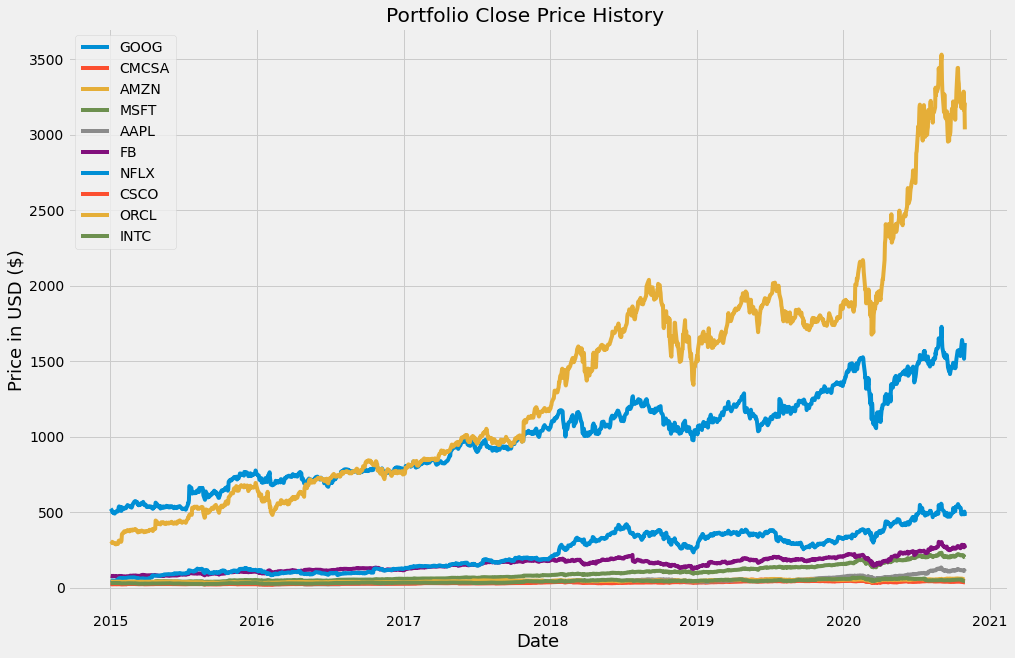

In [25]:
# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Close Price History    '
#Get the stocks
my_stocks = df
#Create and plot the graph
plt.figure(figsize=(15,10)) #width = 15, height = 10
# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price in USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [27]:
#Daily simple returns using Formula = new_price/old_price - 1
returns = df.pct_change()
returns

,GOOG,CMCSA,AMZN,MSFT,AAPL,FB,NFLX,CSCO,ORCL,INTC
Date,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.020846,-0.020394,-0.020517,-0.009196,-0.028172,-0.016061,-0.050897,-0.019920,-0.014024,-0.011276
2015-01-06,-0.023177,-0.013045,-0.022833,-0.014677,0.000094,-0.013473,-0.017121,-0.000370,-0.010323,-0.018637
2015-01-07,-0.001713,-0.000905,0.010600,0.012705,0.014022,0.000000,0.005192,0.009242,0.000232,0.020975
2015-01-08,0.003153,0.021747,0.006836,0.029418,0.038422,0.026658,0.022188,0.007692,0.006025,0.018601
...,...,...,...,...,...,...,...,...,...,...
2020-10-26,-0.030804,-0.028629,0.000824,-0.028442,0.000087,-0.026967,-0.000082,-0.029624,-0.040234,-0.030705
2020-10-27,0.008683,-0.007539,0.024724,0.015089,0.013472,0.022302,0.001413,-0.021237,-0.007132,-0.023116
2020-10-28,-0.054630,-0.033610,-0.037595,-0.049566,-0.046312,-0.055138,-0.005502,-0.031462,-0.026104,-0.030456


In [28]:
# Create and show the annualized co-variance matrix.
cov_matrix_annual = returns.cov() * 253
cov_matrix_annual

,GOOG,CMCSA,AMZN,MSFT,AAPL,FB,NFLX,CSCO,ORCL,INTC
GOOG,0.073496,0.030770,0.054889,0.055441,0.049010,0.057702,0.055946,0.040061,0.035971,0.045443
CMCSA,0.030770,0.061643,0.026858,0.036041,0.034256,0.029765,0.029814,0.034286,0.030499,0.038051
AMZN,0.054889,0.026858,0.096740,0.056588,0.051020,0.059027,0.069860,0.038973,0.032428,0.041645
MSFT,0.055441,0.036041,0.056588,0.078367,0.057073,0.054068,0.056495,0.049271,0.045130,0.057961
AAPL,0.049010,0.034256,0.051020,0.057073,0.088385,0.054508,0.052396,0.046441,0.040426,0.053262
FB,0.057702,0.029765,0.059027,0.054068,0.054508,0.101720,0.060239,0.037850,0.037010,0.045972
NFLX,0.055946,0.029814,0.069860,0.056495,0.052396,0.060239,0.182830,0.042016,0.037455,0.051185
CSCO,0.040061,0.034286,0.038973,0.049271,0.046441,0.037850,0.042016,0.072294,0.042247,0.052389
ORCL,0.035971,0.030499,0.032428,0.045130,0.040426,0.037010,0.037455,0.042247,0.065250,0.044971
INTC,0.045443,0.038051,0.041645,0.057961,0.053262,0.045972,0.051185,0.052389,0.044971,0.102883


In [29]:
# Portfolio variance using the formula :
# Expected portfolio variance= WT * (Covariance Matrix) * W
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.050290250015459274

In [30]:
# Show the portfolio volatility using the formula :
# Expected portfolio volatility= SQRT (WT * (Covariance Matrix) * W)
port_volatility = np.sqrt(port_variance)
port_volatility

0.2242548773504364

In [32]:
#  Portfolio annual simple return
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.24459451038919638

In [33]:
# Expected annual return, volatility (risk), and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/ risk/ standard deviation : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 24.0%
Annual volatility/ risk/ standard deviation : 22.0%
Annual variance : 5.0%


In [34]:
# Here Annual return on the above portfolio is 24 % while risk associated with it is 22% which is not that good.
# So, we need to optimize this portfolio

In [35]:
# OPTIMIZATION OF PORTFOLIO

In [36]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 3.1MB/s 


In [37]:
# Installing the necessary libraries
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [38]:
mu = expected_returns.mean_historical_return(df)#returns.mean() * 252
S = risk_models.sample_cov(df) #Get the sample covariance matrix

In [39]:
# Optimize for maximal Sharpe ration 
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

OrderedDict([('GOOG', 0.0), ('CMCSA', 0.0), ('AMZN', 0.78043), ('MSFT', 0.02174), ('AAPL', 0.02589), ('FB', 0.0), ('NFLX', 0.17194), ('CSCO', 0.0), ('ORCL', 0.0), ('INTC', 0.0)])
Expected annual return: 47.1%
Annual volatility: 29.6%
Sharpe Ratio: 1.52


(0.4706993661490876, 0.29623982833975415, 1.5214003082400707)

In [42]:
# From the above result we can conclude that we can optimize the above portfolio by having about:
# 78.043% of portfolio in Amazon (AMZN)
# 2.174% of portfolio in Microsoft (MSFT)
# 17.194% of portfolio in Netflix (NFLX)
# 0.0% in Google(GOOG), Comcast(CMCSA), Facebook(FB), Cisco(CSCO), Oracle(ORCL), Intel(INTL)

# We can also see that the expected annual return in increased from 24% to 47.1% and the annual volatility is 29.6%


In [43]:
# To get the number of stocks to buy from this portfolio for total amount of USD $ 20,000

In [44]:
pip install pulp

     |████████████████████████████████| 40.6MB 109kB/s 


In [46]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=20000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation(Stocks to buy):", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation(Stocks to buy): {'AMZN': 5, 'MSFT': 2, 'AAPL': 5, 'NFLX': 8}
Funds remaining: $64.09


In [48]:
# So, to get the expected return one should buy:
# 5 stocks of Amazon(AMZN)
# 2 stocks of Microsoft(MSFT)
# 5 stocks of Apple(AAPL)
# 8 stocks of Netflix(NFLX)

# And at the end USD $64.09 will be remaining